In [1]:
!python --version

Python 3.10.14


```text
fastmri                   0.3.0
ipython                   8.15.0
matplotlib                3.8.0
numpy                     1.25.2
opencv-python             4.8.0.76
scikit-image              0.21.0
torch                     2.0.1
```

In [2]:
import cv2
from fastmri.data import subsample
from IPython.display import Image, display
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import structural_similarity, peak_signal_noise_ratio
import torch

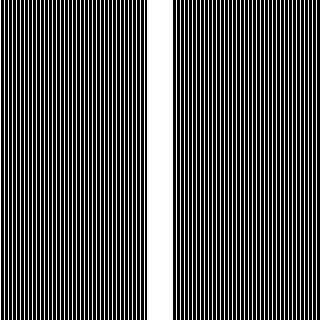

In [3]:
# plot mask
maskfunc = subsample.EquiSpacedMaskFunc([0.08], accelerations=[4])
center_mask, accel_mask, num_low_frequencies = maskfunc.sample_mask(shape=(320, 1), offset=0)
mask = torch.max(center_mask, accel_mask).squeeze().numpy()[np.newaxis, :]
mask = np.ones((320, 320)) * mask
mask = np.array(mask * 255, dtype=np.uint8)
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
cv2.imwrite('mask.png', mask)
display(Image(filename='mask.png'))

In [4]:
for fname in ['i', 'k', 'ki', 'input', 'label']:
    locals()[fname] = np.load(f'{fname}.npy')

max_label = np.max(locals()['label'])
for fname in ['i', 'k', 'ki', 'input', 'label']:
    locals()[fname] /= max_label

data_range = np.max(locals()['label'])
for fname in ['input', 'i', 'k', 'ki']:
    psnr = peak_signal_noise_ratio(locals()['label'], locals()[fname], data_range=data_range)
    ssim = structural_similarity(locals()['label'], locals()[fname], data_range=data_range)
    print(f'{psnr:.2f}/{ssim:.3f}')

for fname in ['i', 'k', 'ki', 'input', 'label']:
    locals()[f'res_{fname}'] = np.abs(locals()['label']-locals()[fname])
max_res = np.max(locals()['res_input'])
print(max_res)

for fname in ['i', 'k', 'ki', 'input', 'label']:
    locals()[f'res_{fname}'] /= max_res

for fname in ['i', 'k', 'ki', 'input', 'label']:
    temp = locals()[fname]
    temp *= 255
    temp = np.array(temp, dtype=np.uint8)
    cv2.imwrite(f'{fname}.png', temp)

for fname in ['i', 'k', 'ki', 'input', 'label']:
    temp = locals()[f'res_{fname}']
    temp *= 255
    temp = np.array(temp, dtype=np.uint8)
    temp = plt.cm.hot(temp, bytes=True)
    temp = cv2.cvtColor(temp, cv2.COLOR_RGB2BGR)
    cv2.imwrite(f'res_{fname}.png', temp)

26.24/0.738
31.15/0.894
31.25/0.868
32.64/0.908
0.47081667


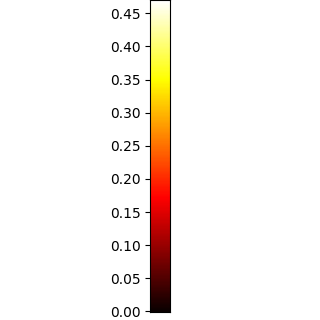

In [5]:
gradient = np.zeros((320, 1))
gradient[:, 0] = np.linspace(1, 0, 320)
gradient = gradient * np.ones((320, 20))
M = len(str(int(1 / max_res)))

ticks = list()
labels = list()


for i in np.arange(0, 0.47, 0.05):
    labels.append(f'{i:.2f}')
    ticks.append(320*(1-i/max_res)-1)

dpi = 100
fig = plt.figure(figsize=(320 / dpi, 320 / dpi), dpi=dpi)
plt.imshow(gradient, cmap='hot')
plt.xticks([], [])
plt.yticks(ticks, labels)
#plt.tick_params(left=False, right=True, labelleft=False, labelright=True)
plt.tight_layout(pad=0)
plt.savefig('colorbar.png')
plt.close()
display(Image(filename='colorbar.png'))